# <center>Coronavirus_Scrape</center>
## <center>Personal Project</center>
<center>Dylan Nguyen</center>

<img src="https://i.guim.co.uk/img/media/4fe61c49f0423809aedfeffe4f273352e31a7ef0/592_522_3856_2315/master/3856.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=e8f7981f218f014e81c0de1daaf55654" width="500"/>
<center><a href="https://www.theguardian.com/world/2020/apr/28/face-masks-coveted-commodity-coronavirus-pandemic">Image from Guardian</a>
</center>

<br>


I picked up this project again after learning a lot of new libraries and modules from my introductory data science course at University of Maryland! Going through this project again in a new perspective also helped me with updating my Discord bot that would be able to do all the functionality of this project as well! 
<br>

I use this [Website](https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/) to get the statistics used in this project.



<hr>
Setup

In [90]:
# Modules needed
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Used to complete autocomplete in Jupyter Notebook
%config Completer.use_jedi = False



Original function created in summer 2020 that was used to save data into a local text file

In [91]:
def webscrape_to_textfile():
    """Webscrapes the worldometers website for coronavirus statistics and saves information into textfile"""
    url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'

    # gets the url's html
    page_content = requests.get(url)
    soup = BeautifulSoup(page_content.text, 'html.parser')

    web_data = []
    df = pd.DataFrame()
    
    
    # soup.find_all('td') will scrape all elements in the url's table elements
    data_iterator = iter(soup.find_all('td'))

    # Loop that repeats until there is no data left available for the iterator
    while True:
        try:
            country = next(data_iterator).text
            confirmed = next(data_iterator).text
            deaths = next(data_iterator).text
            continent = next(data_iterator).text
            
            new_row = {'country':country, 'confirmed':confirmed, 'deaths':deaths}
            print(new_row)
            # Replaces spaces with underscores in country and continent names to help with saving file content later
            country = country.replace(' ', '_')
            continent = continent.replace(' ', '_')
            # This just adds stats into the list while also replacing the confirmed and deaths into ints
            # NOTE: This creates a list of tuples
            df.append(new_row,ignore_index=True)
            
            web_data.append((country,
                             int(confirmed.replace(',', '')),  # This allows for numbers in millions
                             int(deaths.replace(',', '')),
                             continent
                             ))

        # StopIteration error occurs when there are no more elements to iterate through
        except StopIteration:
            break
    
    
    #  Sorts the data by number of confirmed cases
    web_data.sort(key=lambda row: row[1], reverse=True)
#     df.sort(key=lambda row: row[1], reverse=True)
    f = open('webscrape_data.txt', 'w')
    for tuple_unit in web_data:
        f.write(''.join(str(s) + ' ' for s in tuple_unit) + ' \n')
    print(df.head())
    f.close()
    
    return df

New function created in summer 2021 to save data into a Pandas dataframe which allows users to save data to a local csv file. 

In [92]:
def webscrape_to_df():
    """Webscrapes the worldometers website for coronavirus statistics and saves information into textfile"""
    url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'

    # gets the url's html
    page_content = requests.get(url)
    soup = BeautifulSoup(page_content.text, 'html.parser')

    df = pd.DataFrame()
    result = []
    
    # soup.find_all('td') will scrape all elements in the url's table elements
    data_iterator = iter(soup.find_all('td'))

    # Loop that repeats until there is no data left available for the iterator
    while True:
        try:
            country = next(data_iterator).text
            confirmed = next(data_iterator).text
            deaths = next(data_iterator).text
            continent = next(data_iterator).text
            
            # Replaces spaces with underscores in country and continent names to help with saving file content later
            country = country.replace(' ', '_')
            continent = continent.replace(' ', '_')
            
            if continent == '':
                print(country)
                continent = 'Other'
            
            # Fixes confirmed and death cases data type
            confirmed = confirmed.replace(',', '')
            deaths = deaths.replace(',', '')

            
            new_row = {'Country':country, 'Confirmed Cases':int(confirmed), 'Deaths':int(deaths), 'Continent': continent}
            result.append(new_row)


        # StopIteration error occurs when there are no more elements to iterate through
        except StopIteration:
            break
            
    df = pd.DataFrame(result)           
    return df

In [93]:
# df.to_csv('data.csv')
df = webscrape_to_df()  # Saves data that was webscrapped into data frame


MS_Zaandam


## Any Missing Data?
Code below tells us if there is any missing data in any parts of the dataframe. Hopefully it returns false and we can move forward with analysis!

In [94]:
df.isnull().values.any()

False

## Top Ten Countries With The Most Coronavirus Cases

In [95]:
df.head(10)  # prints first 10 rows in data frame

,Country,Confirmed Cases,Deaths,Continent
0,United_States,34557048,620617,North_America
1,India,30453527,400265,Asia
2,Brazil,18622304,520095,South_America
3,France,5777965,111111,Europe
4,Russia,5538142,135886,Europe
5,Turkey,5430940,49774,Asia
6,United_Kingdom,4828463,128162,Europe
7,Argentina,4491551,94772,South_America
8,Italy,4260788,127587,Europe
9,Colombia,4240982,106544,South_America


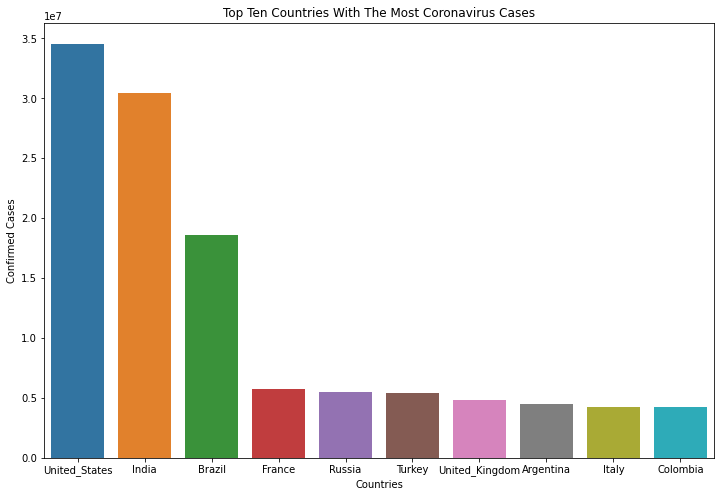

In [96]:
# Code that creates the bar graph
plt.figure(figsize=(12,8))
sns.barplot(data=df.head(10), x='Country', y='Confirmed Cases')
plt.title("Top Ten Countries With The Most Coronavirus Cases")
plt.xlabel("Countries")
plt.ylabel("Confirmed Cases")

plt.show()

## Top Ten Countries With The Least Coronavirus Cases
One interesting thing I found is that not all countries are a part of a particular continent. This is especially true for island countries or regions dominated by water.

In [97]:
df.tail(10)  # prints first 10 rows in data frame

,Country,Confirmed Cases,Deaths,Continent
211,Saint_Pierre_&_Miquelon,26,0,North_America
212,Montserrat,20,1,North_America
213,Solomon_Islands,20,0,Australia/Oceania
214,Western_Sahara,10,1,Africa
215,MS_Zaandam,9,2,Other
216,Vanuatu,4,1,Australia/Oceania
217,Marshall_Islands,4,0,Australia/Oceania
218,Samoa,3,0,Australia/Oceania
219,Saint_Helena,2,0,Africa
220,Micronesia,1,0,Australia/Oceania


## Looking at Confirmed Cases by Continents

In [98]:
confirmed_continental_df = df.groupby(by=["Continent"], dropna=True, sort=True).sum().reset_index().sort_values(by=['Confirmed Cases'],ascending=False)
confirmed_continental_df

,Continent,Confirmed Cases,Deaths
1,Asia,55981002,794106
3,Europe,48057711,1103739
4,North_America,40634601,918927
6,South_America,32998317,1007400
0,Africa,5594484,144073
2,Australia/Oceania,74944,1283
5,Other,9,2


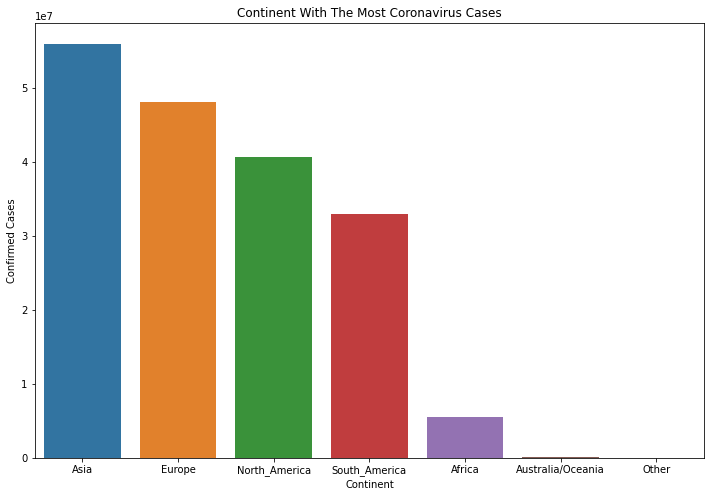

In [99]:
# Code that creates the bar graph
plt.figure(figsize=(12,8))
sns.barplot(data=confirmed_continental_df, x='Continent', y='Confirmed Cases')
plt.title("Continent With The Most Coronavirus Cases")
plt.xlabel("Continent")
plt.ylabel("Confirmed Cases")

plt.show()

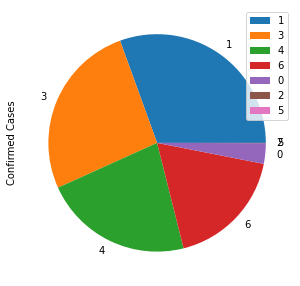

In [100]:
pie_plot = continental_df.plot.pie(y='Confirmed Cases', figsize=(5, 5))

## Looking at Death Cases by Continents
There are differences between total confirmed cases and total death cases between continents. For example, even though Asia has the most confirmed cases, they are 4th in total deaths.

In [101]:
deathcases_continental_df = df.groupby(by=["Continent"], dropna=True, sort=True).sum().reset_index().sort_values(by=['Deaths'],ascending=False)
deathcases_continental_df

,Continent,Confirmed Cases,Deaths
3,Europe,48057711,1103739
6,South_America,32998317,1007400
4,North_America,40634601,918927
1,Asia,55981002,794106
0,Africa,5594484,144073
2,Australia/Oceania,74944,1283
5,Other,9,2


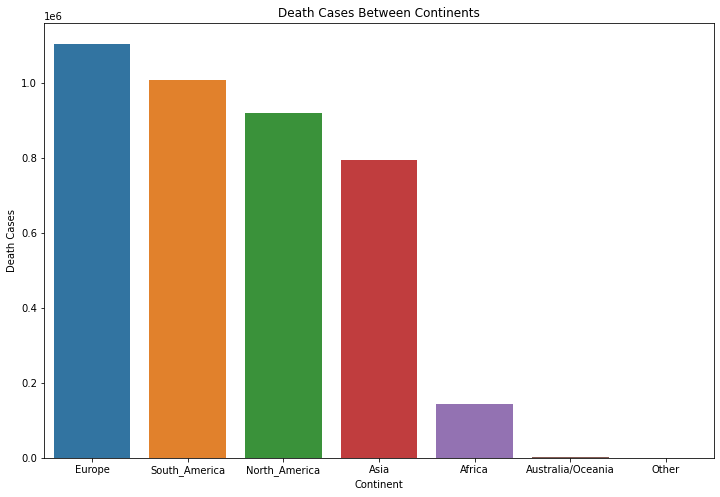

In [102]:
# Code that creates the bar graph
plt.figure(figsize=(12,8))
sns.barplot(data=deathcases_continental_df, x='Continent', y='Deaths')
plt.title("Death Cases Between Continents")
plt.xlabel("Continent")
plt.ylabel("Death Cases")

plt.show()

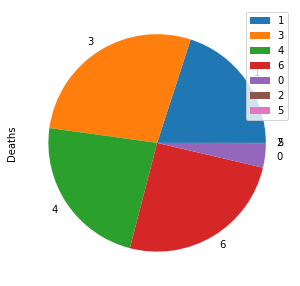

In [103]:
pie_plot = continental_df.plot.pie(y='Deaths', figsize=(5, 5))